In [17]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob
import pandas
import os

In [2]:
real_data_path = "./SNstamps/npy/"
real_lc_path = "./SNstamps/LC/"
real_data_stamps = sorted(glob.glob(real_data_path + "*stamps.npy"), key=str.lower)
real_data_mjds = sorted(glob.glob(real_data_path + "*MJDs.npy"), key=str.lower)
lc_path_list = sorted(glob.glob(real_lc_path + "*dat"), key=str.lower)


In [3]:
# Name comparison
stamp_names = []
lc_names = []
matched_lc = []
matched_stamps = []
matched_mjds = []
n_matched = 0
for stamp_name in real_data_stamps:
    name = stamp_name.split("/")[-1]
    id_name = name.split("_")[0]
    stamp_names.append(id_name)
stamp_names = np.array(stamp_names)

for k, lc_name in enumerate(lc_path_list):
    name = lc_name.split("/")[-1]
    id_name = name.split(".")[0]
    lc_names.append(id_name)
    if id_name in stamp_names:
        matched_lc.append(lc_name)
        index = np.where(stamp_names==id_name)[0]
        #print(index)
        matched_stamps.append(real_data_stamps[index[0]])
        matched_mjds.append(real_data_mjds[index[0]])
        n_matched += 1
        
#lc_names = np.array(lc_names)
print(len(stamp_names))
print(len(lc_names))

#for i in range(n_matched):
#    print("----------------------------")
#    print(matched_stamps[i].split("/")[-1])
#    print(matched_lc[i].split("/")[-1])
#    print(matched_mjds[i].split("/")[-1])


91
124


In [4]:
def rough_photometry(stamp):
    sky_est = []
    lc = []
    for epoch in range(stamp.shape[0]):
        time_stamp = stamp[epoch, :, :]
        border_pixels = np.concatenate([stamp[epoch, 0,:], stamp[epoch, :, 0], 
                                        stamp[epoch, 20, :], stamp[epoch, :, 20]])
        estimated_sky = np.mean(border_pixels)
        sky_est.append(estimated_sky)
        
        time_stamp = time_stamp - estimated_sky
        probable_pixels = time_stamp[5:15, 5:15][time_stamp[5:15, 5:15]>5*np.sqrt(estimated_sky/4.0)]
        #probable_pixels = probable_pixels[5:15, 5:15]
        if epoch==0:
            ref_value = np.sum(probable_pixels)
        time_lc = np.sum(probable_pixels) - ref_value
        lc.append(time_lc)
    return np.array(lc), np.array(sky_est)

In [5]:
stamps = []
days = []
lc_data = []
detection_time = []
max_length = 0
for i, stamp_path in enumerate(matched_stamps):
    stamp = np.load(stamp_path).astype(np.float32)
    mjds = np.load(matched_mjds[i]).astype(np.float32)
    lc_frame = pandas.read_csv(matched_lc[i], sep=' ', comment="#")
    lc_frame = lc_frame[lc_frame["band"]=="g"]
    #print(lc_frame.columns)
    #asdasd
    frame_days = lc_frame["MJD"].values
    #print(np.array_equal(frame_days, np.sort(frame_days)))
    lc_data.append(lc_frame)
    stamps.append(stamp)
    days.append(mjds)
    if len(lc_frame)>max_length:
        max_length = len(lc_frame)
    #print(lc)
    #print(mjds)
    #asdasd
    #print(mjds.shape)
print("n supernovae: "+str(len(stamps)))
print("max length: "+str(max_length))

n supernovae: 90
max length: 28


[-357.8796043  -288.41396063 -123.3378892    14.53340856   13.4285527
   29.61281577   19.48323632    5.4428394   204.64863316  171.44885254
  124.582174    -70.26431246  -28.55981022 -167.81043756   32.59145613
  -68.32853957 -133.9308372  -260.90524654 -252.88984504   -6.54180019
 -384.72786101   52.54970079]
[-446.16555373 -393.0379869  -352.73010581 -215.62860227 -216.89946125
 -301.4159903  -124.47071905 -278.97626798 -372.24711685  -29.86970393
   32.68296059  -59.62628675  -29.29277984 -252.87572032 -412.07946912
 -168.4838924  -104.40272768  336.53617038 -232.05218538  -46.22459978
  310.11592204  361.27976627 -243.83135092 -106.17190137 -328.09099582
 -113.74177307]
[-456.20495485 -401.3673948  -363.06569974 -356.86007173 -358.42570376
 -389.15146847 -339.29634163 -388.76847574 -382.64979303 -325.94455251
 -244.74284161 -346.52590087 -414.1840324  -407.54518051 -707.38041142
 -186.36171599 -256.07661427   21.45144478 -451.40305209 -368.84258552
  138.5694776   311.52444739 -37

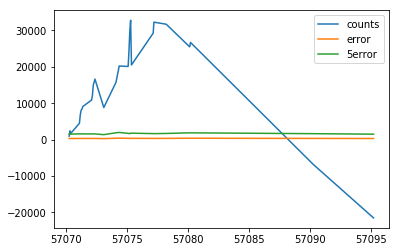

[  -626.59600055    858.49965611    131.6449605    2913.40348415
   5264.47062774   6471.14792977   6824.77216931   7524.12524745
   9316.70884729  10607.90262854  13443.24632964  14204.74284862
  15071.00256016   7453.8776116   13833.75934401  18255.50733436
  18379.32206241  22647.10849128  28046.02184248  31007.4666051
  18748.43104758  27597.79703907  30638.33789904  30016.02888615
  23629.18061849  24842.18903389  -8448.5814943  -23014.11874343]
[ -263.45707728  -322.34685015  -285.90058642  -391.12836524
  -208.17300815  -216.09080078  -232.90605448  -198.52906822
  -273.93805141  -258.01582443  -307.29925384  -175.80393387
  -298.71057571  -365.37968735  -287.31976851  -264.78596304
  -210.72414366  -420.64633878  -466.94099294    22.15164627
    28.65001906   -62.40163148  -505.38597235  -201.68251695
 -1061.16061483  -297.06527919]
[-450.00426368 -476.5022119  -470.21111018 -326.02751837 -295.90625302
 -339.18733174 -361.20854289 -434.66332267 -120.22349284 -126.70787723
 -162

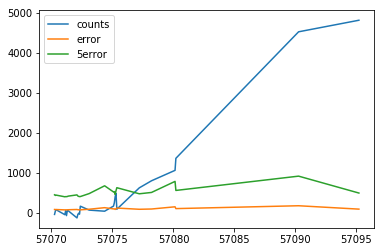

[-489.84639019 -387.65620405 -363.65095036 -446.69708155 -352.47507765
 -473.55755533 -347.21068809 -364.83699449 -574.69842218 -461.9051374
 -419.65859432 -439.19932046 -240.89828635 -412.14995877 -634.0583572
 -353.01100954 -280.80971085  -55.64669724  -69.81222172 -537.18984578
  148.32177539  291.40278051  275.81666243  801.73300462 3602.78221275
 4313.20522946]
cp ./SNstamps/npy/SNHiTS15am_stamps.npy ./SNstamps/npy/brighter/SNHiTS15am_stamps.npy
cp ./SNstamps/npy/SNHiTS15am_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15am_MJDs.npy
cp ./SNstamps/LC/SNHiTS15am.dat ./SNstamps/npy/brighter/SNHiTS15am.dat


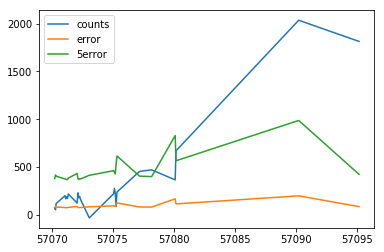

[-305.05997663 -363.48290055 -287.58273757 -176.23201307 -207.26635737
 -179.03087299 -199.17785995 -166.34009423 -309.91870883 -146.48629517
 -189.56880234 -186.22795618 -212.39366396 -446.24790941 -241.36812127
 -171.96632949 -207.46817247 -445.04948105 -378.02679871   48.5504474
   71.09900727 -464.27801487  103.93408768 1049.25046578 1391.56268655]
cp ./SNstamps/npy/SNHiTS15an_stamps.npy ./SNstamps/npy/brighter/SNHiTS15an_stamps.npy
cp ./SNstamps/npy/SNHiTS15an_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15an_MJDs.npy
cp ./SNstamps/LC/SNHiTS15an.dat ./SNstamps/npy/brighter/SNHiTS15an.dat


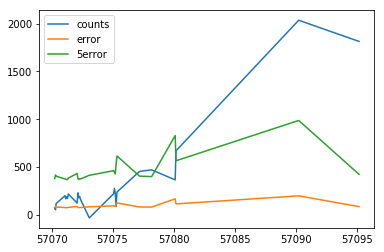

[-305.05997663 -363.48290055 -287.58273757 -176.23201307 -207.26635737
 -179.03087299 -199.17785995 -166.34009423 -309.91870883 -146.48629517
 -189.56880234 -186.22795618 -212.39366396 -446.24790941 -241.36812127
 -171.96632949 -207.46817247 -445.04948105 -378.02679871   48.5504474
   71.09900727 -464.27801487  103.93408768 1049.25046578 1391.56268655]
[-460.05354379 -505.87755106 -492.4286013  -378.42071539 -195.15870447
 -241.87859038 -469.93612162 -183.99223476 -186.28864956 -112.6967535
 -171.16557943 -145.98376358 -131.34029037 -389.63263737 -105.26930037
 -387.5695174   -14.52294017 -212.44793945 -602.48657786  -36.34842111
  134.24488444  -20.66448276 -286.51248887 -333.71493695 -371.45671748
 -354.5493323 ]
[-460.05354379 -505.87755106 -492.4286013  -378.42071539 -195.15870447
 -241.87859038 -469.93612162 -183.99223476 -186.28864956 -112.6967535
 -171.16557943 -145.98376358 -131.34029037 -389.63263737 -105.26930037
 -387.5695174   -14.52294017 -212.44793945 -602.48657786  -36.3

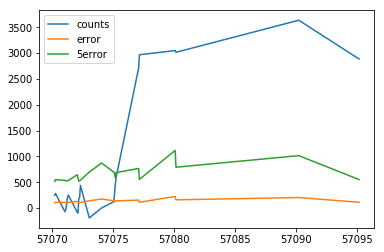

[-263.9806908  -268.5540209  -607.96761766 -558.22343476 -455.06800121
 -328.05240457 -280.76742034 -721.84332817 -682.44777592 -346.42672735
 -316.6068763  -105.43635489 -887.39991047 -871.48928612 -578.76855412
 -426.93055366 -139.22199961  -95.40057596 1948.25624905 2414.52277403
 1934.76475074 2226.51464757 2623.1740224  2335.61750985]
[-5.55965232e+02 -4.53812550e+02 -2.05274570e+02 -2.31141777e+02
 -2.60340036e+02 -2.31683279e+02 -1.44897579e+02 -3.58807733e+02
 -2.52184042e+02 -3.04416797e+02  7.29825300e-02 -1.91788353e+02
 -1.25009098e+02 -4.11326378e+02 -3.10485930e+01  1.22439310e+02
  2.68323527e+02  2.06908428e+01 -1.36908905e+02  5.22340754e+02
  5.59456458e+02  1.95886928e+02 -1.41712878e+02 -2.53104223e+02]
[-402.36300128 -277.17170433 -207.08219106  -41.02867927 -111.25839029
 -123.21046927 -162.67896741 -301.41691327 -172.43267491   22.24725308
  -26.8177181    23.19636166 -230.19695506 -317.19781982 -157.69860404
  -21.06766129 -171.00192456 -266.0500641   -68.075909

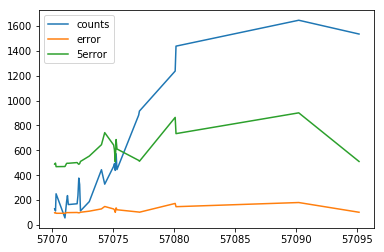

[-360.21074558 -384.60181236 -218.02063843 -412.95914136 -306.46492345
 -259.98507143 -331.81644922 -330.97199012 -257.69568035 -111.02579513
 -167.23435149 -397.36829219 -365.89340186 -200.92505644 -414.06829974
 -171.4208257  -110.63112781  -68.41795412 -114.21160591 -165.60744348
  363.75248286  403.1770614   372.42621836  703.04907186  744.16394373
 1024.15200783]
cp ./SNstamps/npy/SNHiTS15av_stamps.npy ./SNstamps/npy/brighter/SNHiTS15av_stamps.npy
cp ./SNstamps/npy/SNHiTS15av_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15av_MJDs.npy
cp ./SNstamps/LC/SNHiTS15av.dat ./SNstamps/npy/brighter/SNHiTS15av.dat


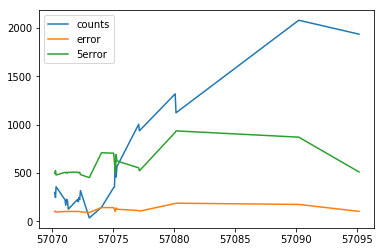

[-199.45910169 -278.27217877 -121.45090198 -283.39809034 -334.61859713
 -280.56506112 -284.981745   -381.38797638 -286.89273467 -299.993498
 -258.41896939 -285.72056994 -166.01313448 -416.95300263 -564.80384465
 -356.64782451 -257.01429975  113.35935027 -233.46580172  -57.91398704
  451.16859722  414.14770258  398.70235676  187.48149613 1210.18153251
 1426.38051594]
cp ./SNstamps/npy/SNHiTS15aw_stamps.npy ./SNstamps/npy/brighter/SNHiTS15aw_stamps.npy
cp ./SNstamps/npy/SNHiTS15aw_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15aw_MJDs.npy
cp ./SNstamps/LC/SNHiTS15aw.dat ./SNstamps/npy/brighter/SNHiTS15aw.dat


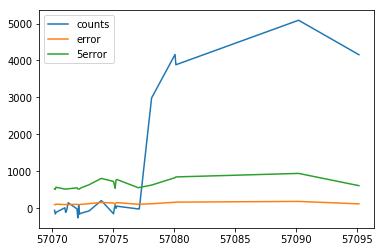

[-579.47856735 -666.42409817 -679.39971589 -505.41816003 -635.96054859
 -594.12409673 -481.68640231 -375.85805923 -570.08776939 -781.70073496
 -439.8527962  -680.3107494  -682.76504034 -708.19692698 -599.06685517
 -873.71220672 -646.5278919  -456.26613222 -759.174873   -721.73657999
 -572.47587162 -578.15546808 2355.05711209 3331.18340421 3033.04612279
 4141.50678739 3540.94842695]
[-310.43578467 -226.60486981 -281.5986202  -355.62320692 -340.84279089
 -297.44211743 -253.45245422 -266.27344554 -402.11856444 -454.34983207
 -307.24561555 -283.34553188 -273.68746524 -451.38940047  367.30168085
  525.65944435  903.58008062  530.73980574  157.66878445  646.44452553
  754.67134375  634.32676363 -476.60595587  205.51404289 -541.89491949
  108.71276616]
[-362.70316621 -585.23886351 -567.47663538 -787.81903382 -657.90891009
 -434.88741488 -902.03072989 -772.9631685  -385.6087282  -583.76463568
 -196.35057588 -333.45713161 -701.71536848 -378.87493338   17.50784907
  156.746451    288.96120229  -

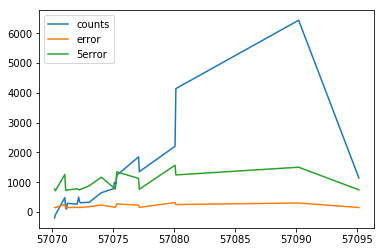

[-965.83642826 -810.08912017 -778.80690139 -604.62871314 -627.53604649
 -446.40185492 -453.21258291 -512.3700375  -400.53320189 -258.88323246
 -381.34489061 -448.42876796 -552.62202603 -521.89821684  -39.96586033
  162.49629058  227.64855216  -15.94697139 -113.90404884  722.31338998
  589.17030199  636.85469027 2899.58101018 4937.23205635  397.35717289]
cp ./SNstamps/npy/SNHiTS15be_stamps.npy ./SNstamps/npy/brighter/SNHiTS15be_stamps.npy
cp ./SNstamps/npy/SNHiTS15be_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15be_MJDs.npy
cp ./SNstamps/LC/SNHiTS15be.dat ./SNstamps/npy/brighter/SNHiTS15be.dat


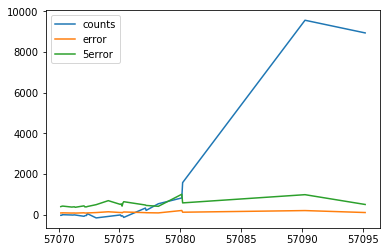

[-428.61907268 -441.13323855 -413.13800786 -423.78277034 -390.11050702
 -399.40938313 -396.62014893 -380.16620003 -512.91326393 -436.87040535
 -425.00461013 -424.94870576 -352.1087159  -652.60032809 -776.80871961
 -519.40364074 -609.94760437 -471.40080462 -649.90311095 -773.24534992
 -150.71886482 -243.48378631  125.66662307 -181.57655401  998.78022953
 8589.86576795 8448.20950409]
cp ./SNstamps/npy/SNHiTS15bf_stamps.npy ./SNstamps/npy/brighter/SNHiTS15bf_stamps.npy
cp ./SNstamps/npy/SNHiTS15bf_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15bf_MJDs.npy
cp ./SNstamps/LC/SNHiTS15bf.dat ./SNstamps/npy/brighter/SNHiTS15bf.dat


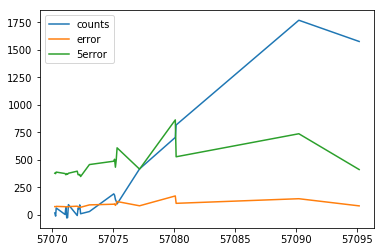

[-361.10738121 -386.11627496 -326.33510006 -372.04462634 -293.17421708
 -402.84992576 -394.44638944 -285.46922112 -403.06951834 -304.23393423
 -309.23781842 -276.36435294 -338.0867203  -426.90742118 -296.86378037
 -327.01679725 -292.75655147 -378.85946653 -509.44039269    2.02442574
 -159.17013251  288.91920982 1031.42763932 1163.73723914]
cp ./SNstamps/npy/SNHiTS15bg_stamps.npy ./SNstamps/npy/brighter/SNHiTS15bg_stamps.npy
cp ./SNstamps/npy/SNHiTS15bg_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15bg_MJDs.npy
cp ./SNstamps/LC/SNHiTS15bg.dat ./SNstamps/npy/brighter/SNHiTS15bg.dat


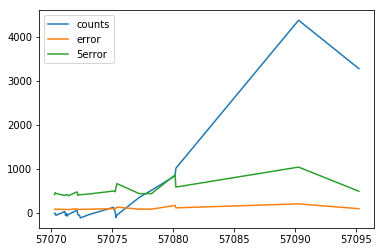

[-427.41261752 -468.50864445 -495.44167173 -362.07203068 -473.84584292
 -423.71295707 -484.13841418 -423.42708711 -415.79887519 -440.04835936
 -455.06035777 -466.93050018 -525.83192145 -467.0332954  -369.74246486
 -418.98762404 -456.51489095 -687.75515197 -715.24511082  -85.24760906
   75.52129931  -19.82243168  426.16011363 3329.46008126 2779.81477626]
[-317.05690761 -375.82979762 -335.84472271 -291.33754726 -342.50059391
 -356.09188334 -325.37154699 -374.08039743 -387.69488487 -320.50394893
 -347.40048843 -351.78030418 -368.79383957 -393.61202997 -192.93620792
 -353.10232774 -288.2720398  -366.8936418  -137.06756216 -141.52081116
   -1.17634129    1.34214256  439.57679818  582.11599188]
[ -723.9832862   -669.28961266  -353.51631007  -319.22157643
  -803.73363302  -791.2466033   -391.60609781  -250.83082874
  -363.20041473  -614.49485095  -483.65586483  -179.88509128
  -290.94069443  -514.84338772  -800.22939655   267.30158096
   273.78673625    34.62048681  -299.73061113   530.566675

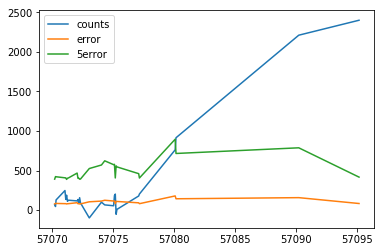

[-321.11936608 -377.85816747 -292.6471874  -160.78601003 -271.58784844
 -199.25388548 -292.07293253 -280.12820555 -351.40046145 -268.93237546
 -313.18319671 -233.29579837 -301.06861895 -623.68054504 -469.70293692
 -556.72183229 -519.02377677 -395.12306928 -203.80668784 -611.48663531
 -536.5520426  -281.97038554 -202.50650607 -134.05648612  198.48059718
 1422.59899448 1981.60336331]
[-252.33288407 -185.36610583 -276.44021098 -274.01679045 -257.14839921
 -254.40069191 -280.27999521 -173.37325299 -345.62779005 -273.66550431
 -235.76950887 -298.32558649 -251.82618554 -594.59581179 -515.91849763
 -455.01845835 -292.43344714 -152.1957074  -524.95157308 -589.63717346
 -170.56951786  -22.56006824 -219.96428896  254.80744963  320.0320717
  326.86033629]
cp ./SNstamps/npy/SNHiTS15bl_stamps.npy ./SNstamps/npy/brighter/SNHiTS15bl_stamps.npy
cp ./SNstamps/npy/SNHiTS15bl_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15bl_MJDs.npy
cp ./SNstamps/LC/SNHiTS15bl.dat ./SNstamps/npy/brighter/SNHiTS15bl.dat


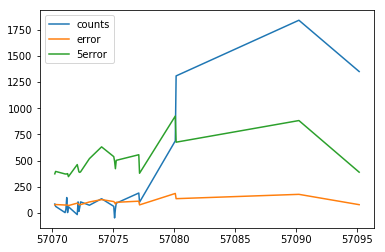

[-288.65965302 -334.53635317 -369.79046105 -335.90706283 -225.64427587
 -372.45408539 -288.12353945 -478.36806397 -323.01763856 -378.194243
 -333.52755205 -287.51554764 -445.64967127 -496.14943646 -475.55910458
 -542.54367475 -386.09304948 -409.88225097 -366.23889312 -276.47295378
 -237.51170641  633.91786225  959.52928273  962.74283929]
[-479.17784928 -454.25359798 -565.17918858 -415.31304426 -445.31517682
 -431.72601816 -436.45494864 -492.33231429 -497.00735965 -396.00589124
 -444.33010203 -396.87012367 -355.7031921  -440.96449526 -588.35191882
 -699.19163733 -581.38445899 -275.122451   -186.02455687  -29.51827104
 -261.91654021  197.23328536 -268.41308799  335.20904871]
[-479.17784928 -454.25359798 -565.17918858 -415.31304426 -445.31517682
 -431.72601816 -436.45494864 -492.33231429 -497.00735965 -396.00589124
 -444.33010203 -396.87012367 -355.7031921  -440.96449526 -588.35191882
 -699.19163733 -581.38445899 -275.122451   -186.02455687  -29.51827104
 -261.91654021  197.23328536 -268.

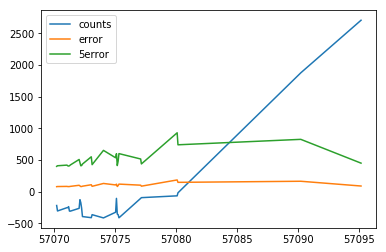

[ -617.98199807  -713.53124191  -671.69706426  -660.53778052
  -640.41373392  -714.74843886  -728.38940214  -770.80332932
  -585.17453305  -582.03222787  -671.85723514  -828.55301989
  -960.82592301  -789.10571464 -1065.60048537  -859.32587809
  -704.35744606  -766.57536957  -840.24333539 -1013.09494947
  -621.47384039  -532.04520796  -994.618828    -757.34166386
  1049.52660831  2254.81238723]
[-383.59892958 -345.92989453 -359.478834   -263.708136   -354.10211837
 -270.01831215 -351.15773432 -511.26070448 -311.01734515 -344.38591127
 -353.79656527 -385.55235653 -456.9676014  -588.18697094 -467.27347868
 -504.19494008 -315.62977915 -492.0761518  -540.05957668 -493.29321
 -405.7187617  -732.28086153 -603.51390583  -81.18239396  414.56533463]
cp ./SNstamps/npy/SNHiTS15br_stamps.npy ./SNstamps/npy/brighter/SNHiTS15br_stamps.npy
cp ./SNstamps/npy/SNHiTS15br_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15br_MJDs.npy
cp ./SNstamps/LC/SNHiTS15br.dat ./SNstamps/npy/brighter/SNHiTS15br.dat


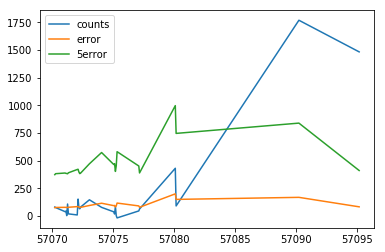

[-292.33501932 -306.14383898 -349.1951529  -340.62126852 -380.49619822
 -273.53742093 -371.33897322 -410.75894035 -269.48037207 -320.95521072
 -318.00205989 -306.59578788 -325.22042191 -495.47654142 -427.29005786
 -454.85552425 -316.56730088 -450.66600821 -598.47528909 -405.89463897
 -325.81676974 -566.03872436 -655.473653    929.53618748 1072.06394782]
cp ./SNstamps/npy/SNHiTS15bs_stamps.npy ./SNstamps/npy/brighter/SNHiTS15bs_stamps.npy
cp ./SNstamps/npy/SNHiTS15bs_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15bs_MJDs.npy
cp ./SNstamps/LC/SNHiTS15bs.dat ./SNstamps/npy/brighter/SNHiTS15bs.dat


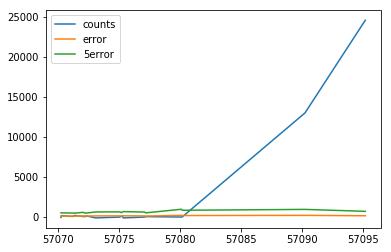

[ -568.74124931  -341.03084563  -425.95764193  -396.29673313
  -440.52546864  -387.51198294  -283.56410177  -523.85936968
  -417.89729865  -485.34562446  -412.57852884  -370.35797774
  -742.30391019  -653.25814198  -537.6417257   -444.70092431
  -478.02073035  -791.25310414  -617.53928516  -467.20275765
  -974.6694683   -832.71859255 12073.31277397 23903.47387137]
cp ./SNstamps/npy/SNHiTS15bt_stamps.npy ./SNstamps/npy/brighter/SNHiTS15bt_stamps.npy
cp ./SNstamps/npy/SNHiTS15bt_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15bt_MJDs.npy
cp ./SNstamps/LC/SNHiTS15bt.dat ./SNstamps/npy/brighter/SNHiTS15bt.dat


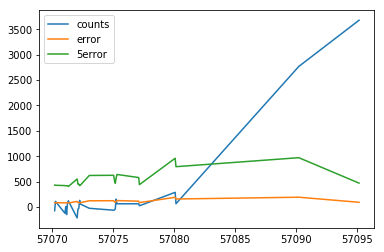

[-504.68610946 -317.06230472 -544.88496147 -404.25773926 -568.08994687
 -355.96436652 -280.02037231 -765.56027413 -494.90196561 -476.13253322
 -289.38619416 -374.98915053 -645.93195046 -686.89020786 -582.95351562
 -503.27387307 -412.32359271 -577.08523949 -516.46854654 -415.76849134
 -670.55377461 -728.71053728 1795.35358904 3205.1401229 ]
cp ./SNstamps/npy/SNHiTS15bu_stamps.npy ./SNstamps/npy/brighter/SNHiTS15bu_stamps.npy
cp ./SNstamps/npy/SNHiTS15bu_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15bu_MJDs.npy
cp ./SNstamps/LC/SNHiTS15bu.dat ./SNstamps/npy/brighter/SNHiTS15bu.dat


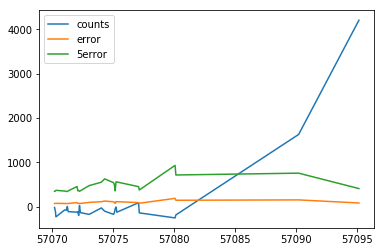

[ -364.37532591  -450.75771544  -598.14371805  -422.76003194
  -420.967469    -339.57199328  -467.23489664  -576.93845058
  -472.50283314  -562.60491082  -319.63764188  -492.2765938
  -648.61719577  -580.02623706  -726.66009686  -715.50271711
  -637.34876987  -407.17779792  -563.55521723  -681.79859732
  -363.00690106  -516.13958385 -1184.21871421  -900.79863519
   873.06740922  3795.113702  ]
[-248.85474903 -280.66733251 -228.62777947 -233.7052144  -314.27968977
 -299.4889092  -367.05155732 -292.13865816 -436.96716265 -304.35062507
 -191.82394685 -303.30657368 -179.34217306 -381.84063463 -587.22256891
 -547.3309961  -623.32456175 -293.63505764 -458.44488054 -484.86097957
 -236.63727495 -314.74290644 -333.87489228 -675.61494618  295.31346666
 1057.32981051]
[-334.39116466 -320.04158227 -327.22222072 -427.80854383 -368.16736203
 -340.80673971 -295.21271842 -301.25332258 -311.65986535 -317.70834894
 -364.64495821 -325.88433962 -321.22141832 -449.62861203 -444.15952532
 -738.37548259 -462

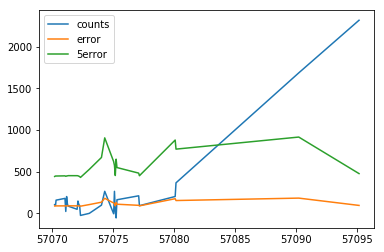

[-338.61255641 -353.48750176 -289.3003711  -269.9113128  -421.12604809
 -246.51714826 -341.24573589 -365.77318875 -403.00936215 -302.70419562
 -340.63210782 -346.13739972 -455.72108543 -527.36749457 -571.41129584
 -640.61789737 -625.45302552 -310.8238775  -433.20045977 -704.27196475
 -386.02532861 -271.88303465 -358.92090156 -676.65556406 -404.09968829
  769.34583177 1838.37547849]
cp ./SNstamps/npy/SNHiTS15by_stamps.npy ./SNstamps/npy/brighter/SNHiTS15by_stamps.npy
cp ./SNstamps/npy/SNHiTS15by_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15by_MJDs.npy
cp ./SNstamps/LC/SNHiTS15by.dat ./SNstamps/npy/brighter/SNHiTS15by.dat


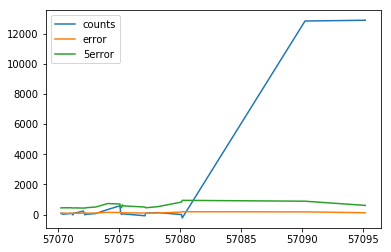

[ -361.04379532  -354.0174707   -427.64305768  -375.68020804
  -399.56153259  -459.24089762  -326.06641827  -352.58193084
  -198.76363244  -342.42183787  -460.38717948  -346.97354329
  -436.80889919  -433.71959356  -398.53672099  -117.97588063
  -415.97795902  -451.83731891  -575.13050486  -529.21135205
  -581.05569956  -353.06185276  -395.57556724  -824.9531689
 -1164.36598202 11944.53989231 12274.34938794]
[-478.44566346 -345.21621633 -446.0352472  -409.02853761 -409.46992547
 -477.02607174 -403.99298387 -463.58389264 -497.2519884  -482.58567493
 -380.89825717 -417.8712818  -407.62440725 -590.49548031 -815.36695254
 -618.20255037 -416.1718146  -504.86825185 -656.72683009 -676.69758516
 -333.92749551 -372.82043369 -222.17797566 -152.87464087  432.81773696
  851.8194867 ]
cp ./SNstamps/npy/SNHiTS15C_stamps.npy ./SNstamps/npy/brighter/SNHiTS15C_stamps.npy
cp ./SNstamps/npy/SNHiTS15C_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15C_MJDs.npy
cp ./SNstamps/LC/SNHiTS15C.dat ./SNstamps/npy/brighte

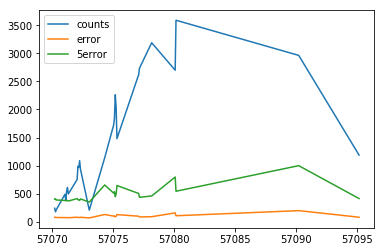

[-161.1357489  -231.3899208  -180.69355973  109.74333786   12.72173298
  158.47773625  233.19623916  126.16511696  339.34328377  593.98931159
  577.53218363  706.69806009  528.63154067 -143.66199565  484.78464154
 1210.3451934  1308.38725432 1813.42061742 1534.34207736  835.77705141
 2114.16652084 2294.19091833 2726.86147827 1901.18910636 3042.72734018
 1962.20394208  773.90195306]
[-478.44566346 -345.21621633 -446.0352472  -409.02853761 -409.46992547
 -477.02607174 -403.99298387 -463.58389264 -497.2519884  -482.58567493
 -380.89825717 -417.8712818  -407.62440725 -590.49548031 -815.36695254
 -618.20255037 -416.1718146  -504.86825185 -656.72683009 -676.69758516
 -333.92749551 -372.82043369 -222.17797566 -152.87464087  432.81773696
  851.8194867 ]
cp ./SNstamps/npy/SNHiTS15cb_stamps.npy ./SNstamps/npy/brighter/SNHiTS15cb_stamps.npy
cp ./SNstamps/npy/SNHiTS15cb_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15cb_MJDs.npy
cp ./SNstamps/LC/SNHiTS15cb.dat ./SNstamps/npy/brighter/SNHiTS15cb.dat


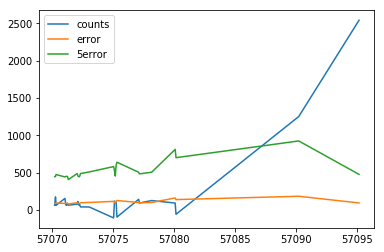

[-383.25297624 -272.75403363 -413.10591631 -286.61852787 -379.2128398
 -389.11017761 -359.97313882 -342.31155564 -409.37105036 -342.03733267
 -377.2845512  -375.52705591 -446.59205821 -469.53124092 -687.65472925
 -412.00307096 -362.65944564 -499.88214524 -734.3794026  -362.14280584
 -389.71330458 -379.91529959 -718.98128732 -758.00867386  326.95725316
 2064.32854384]
[-299.69131537 -373.8346564  -301.38798514 -212.34347877 -280.17228692
 -216.67830914 -257.29949778 -264.65128972 -289.60983972 -329.59483263
 -263.16482387 -243.47764906 -158.90526745 -353.26712466 -284.44704356
 -458.55193958 -303.04681595 -533.66742123 -157.51128703 -235.3539704
 -191.25928907 -828.82940856 -206.67899222  310.02414319  921.20036356]
[-297.71010644 -417.57700611 -330.5894901  -366.26318549 -293.36721076
 -447.622228   -277.57051007 -279.26017764 -474.59631284 -321.88283275
 -390.10525017 -341.61603302 -430.48468225 -477.01383775 -409.74670099
 -393.09412353 -458.75862582 -505.33428307 -647.03145082 -359.

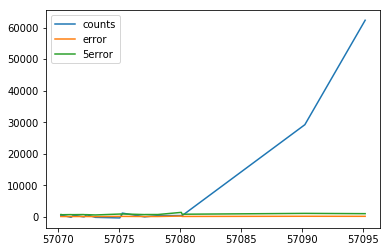

[-2.83138000e+02 -2.35540117e+02 -2.18182717e+02 -8.40510016e+02
 -6.41472771e+02 -3.64229989e+02 -4.04793030e+02 -2.09388425e+02
 -7.14319107e+02 -6.98565910e+02 -5.42066187e+02 -2.88768837e+02
 -2.66486668e+01 -7.59730766e+02 -1.22586996e+03 -7.48651291e+02
 -3.76494040e+02  2.70860317e+02 -7.24511810e+02 -6.96150404e+02
 -3.50028470e+02 -1.00747723e+03 -4.45905238e+02  2.80942000e+04
  6.12646704e+04]
cp ./SNstamps/npy/SNHiTS15cf_stamps.npy ./SNstamps/npy/brighter/SNHiTS15cf_stamps.npy
cp ./SNstamps/npy/SNHiTS15cf_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15cf_MJDs.npy
cp ./SNstamps/LC/SNHiTS15cf.dat ./SNstamps/npy/brighter/SNHiTS15cf.dat


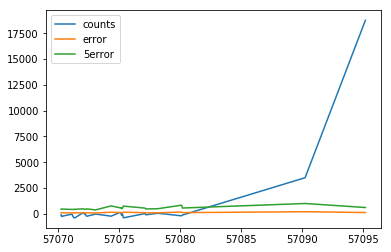

[ -551.4278247   -743.9206418   -686.06220768  -468.45923141
  -490.95939456  -693.72511751  -807.79702679  -833.48409574
  -358.53315982  -461.69106576  -397.55530901  -618.55073983
  -706.3323372   -404.70971822  -995.16919956  -440.37001177
  -559.57913854  -645.31621893  -562.91879195 -1138.32121393
  -529.65986059  -568.59861155  -444.18778814 -1032.62739318
  -680.23657883  2499.70252376 18154.25816125]
cp ./SNstamps/npy/SNHiTS15cg_stamps.npy ./SNstamps/npy/brighter/SNHiTS15cg_stamps.npy
cp ./SNstamps/npy/SNHiTS15cg_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15cg_MJDs.npy
cp ./SNstamps/LC/SNHiTS15cg.dat ./SNstamps/npy/brighter/SNHiTS15cg.dat


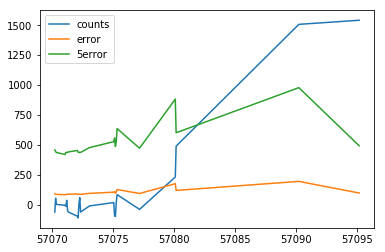

[-519.35791267 -391.30141942 -433.55793124 -424.20151448 -450.32072486
 -400.016051   -486.13171677 -502.4246304  -548.5147476  -549.80661115
 -430.12078303 -378.95669533 -498.22436003 -487.17174367 -508.2984745
 -649.49489911 -584.5578698  -508.57445009 -551.43878556 -510.9697352
 -650.12746461 -111.63469468  528.66091246 1048.40368721]
[-461.18615105 -416.23218255 -489.13956823 -455.47796565 -498.50523481
 -469.5570994  -457.82907274 -438.51706319 -570.28994066 -376.8985181
 -342.24746915 -434.28805174 -391.45329257 -507.45916986 -490.6298174
 -534.14630799 -480.23252588 -572.53918634   29.11218772  -43.50288348
  340.1665598   112.4051188   500.7329395 ]
[-388.79778384 -476.59506605 -471.72600242 -345.91993914 -301.6307751
 -354.89346734 -355.63772477 -447.39073783 -374.71125169 -236.24704785
 -404.53438443 -377.9555571  -295.95031534 -539.89029529 -723.12211697
 -273.96399238 -221.04550136   -5.64421188 -416.44234209 -283.70472983
 -105.78397881  173.94814223 -794.30210033  133.708

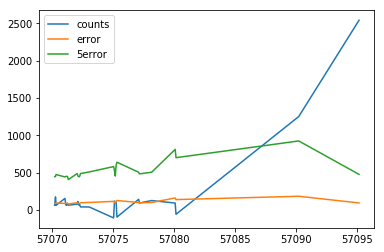

[-383.25297624 -272.75403363 -413.10591631 -286.61852787 -379.2128398
 -389.11017761 -359.97313882 -342.31155564 -409.37105036 -342.03733267
 -377.2845512  -375.52705591 -446.59205821 -469.53124092 -687.65472925
 -412.00307096 -362.65944564 -499.88214524 -734.3794026  -362.14280584
 -389.71330458 -379.91529959 -718.98128732 -758.00867386  326.95725316
 2064.32854384]
[-318.4999892  -427.63817288 -329.93632071 -372.06031674 -379.68509675
 -306.65619911 -280.43445944 -371.50473395 -315.23183889 -254.72438046
 -381.11275607 -434.74687494 -421.89411102 -572.15875873 -789.68845592
 -314.09353581 -349.7341978  -299.99141398 -467.83141265 -456.33651142
 -401.75247127 -318.18859063 -290.32912752 -868.46702045 -377.54097468
  325.55588618  768.91450282]
[-548.7973578  -454.53867141 -494.09676045 -590.92255646 -445.56400301
 -490.58670916 -412.18941679 -498.08099865 -487.72872095 -516.76079432
 -503.24839232 -507.9391619  -329.98928586 -467.40046463 -753.81999877
 -594.60342093 -674.2109585  -47

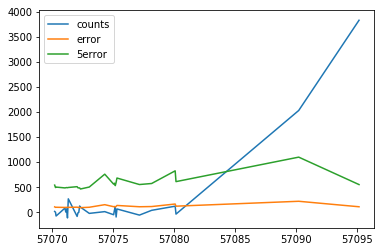

[-524.25112123 -492.68602804 -576.67949674 -402.4611696  -484.26222672
 -424.70796374 -602.05991942 -226.25476758 -592.69413749 -498.3533307
 -487.45311792 -359.84581809 -362.46813305 -525.33476166 -746.53442856
 -609.41521383 -536.99693286 -429.15742961 -691.59818121 -616.53695202
 -609.35642577 -534.59378035 -704.73233646 -647.02903157  930.11827553
 3275.68188504]
[-264.24735846 -253.43744812 -178.03088439  311.34890652  289.69777257
  356.8024309   486.69733562  332.96151376  527.90445743  749.32381531
  679.04769474  638.57531647  415.44252216  201.59927326  480.86724657
  721.84544474  821.38311243  735.35229138  315.41260354  658.72980254
  965.84686556  931.47949394  204.94270594  711.67337124  -40.64653417
  603.98846906]
cp ./SNstamps/npy/SNHiTS15E_stamps.npy ./SNstamps/npy/brighter/SNHiTS15E_stamps.npy
cp ./SNstamps/npy/SNHiTS15E_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15E_MJDs.npy
cp ./SNstamps/LC/SNHiTS15E.dat ./SNstamps/npy/brighter/SNHiTS15E.dat


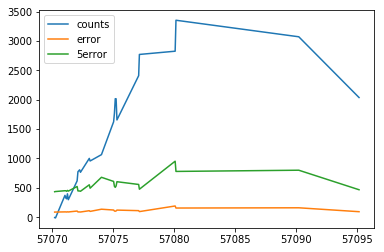

[-440.60846955 -449.1458222   -78.95561353 -120.77876488 -127.72019726
  -57.93010471 -146.11080152   94.99491941  326.66245959  360.42564407
  323.56530448  449.11792316  463.30078294  385.6968936  1015.787407
 1248.73821455 1509.28961953 1483.33178163 1051.86095938 1852.00293668
 2294.70879083 1872.779498   2573.85085777 2271.66239592 1569.8706075 ]
[-391.05045357 -300.82526544 -131.12336101   11.3909655   -88.72460167
   12.64129244  -53.14521157  -17.41835749  247.61157166  179.93002727
  224.96463081   26.21953914   40.65830435 -362.4520869  -135.21441557
  128.41291699  265.35555809   14.25773684 -305.31350329   86.22673139
  298.94392617 -588.76380766 -277.68819767 -647.90808724 -246.57342177]
cp ./SNstamps/npy/SNHiTS15G_stamps.npy ./SNstamps/npy/brighter/SNHiTS15G_stamps.npy
cp ./SNstamps/npy/SNHiTS15G_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15G_MJDs.npy
cp ./SNstamps/LC/SNHiTS15G.dat ./SNstamps/npy/brighter/SNHiTS15G.dat


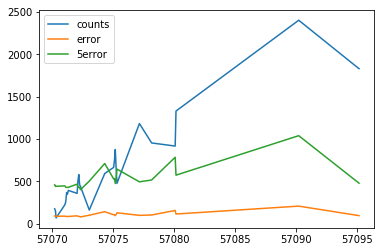

[-283.43360761 -292.10411484 -373.46978614 -221.30431971 -170.09237476
  -60.43070755  -79.17194973  -36.46044405 -109.0951135    66.13134639
  152.42659924   29.05034262   38.19663717 -341.64589289 -117.58599679
  135.2555203   213.15410424  402.16092487  105.20785551 -168.65679145
  688.22675624  437.63476737  132.41555926  757.45655182 1363.74191149
 1352.59048036]
cp ./SNstamps/npy/SNHiTS15H_stamps.npy ./SNstamps/npy/brighter/SNHiTS15H_stamps.npy
cp ./SNstamps/npy/SNHiTS15H_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15H_MJDs.npy
cp ./SNstamps/LC/SNHiTS15H.dat ./SNstamps/npy/brighter/SNHiTS15H.dat


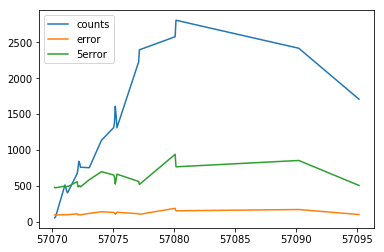

[-424.95965063 -406.40686609   16.21747308  -11.7541027   -59.58461518
  -92.78628982  -70.24004985  112.03014418  246.48735149  353.04269705
  315.87742183  273.17027521  167.23429271  437.54178341  660.3541582
  758.58394916 1085.34488559  896.53190639  647.90195047 1667.00470374
 1875.92288243 1638.53083362 2042.52870339 1563.85531397 1201.84514534]
cp ./SNstamps/npy/SNHiTS15I_stamps.npy ./SNstamps/npy/brighter/SNHiTS15I_stamps.npy
cp ./SNstamps/npy/SNHiTS15I_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15I_MJDs.npy
cp ./SNstamps/LC/SNHiTS15I.dat ./SNstamps/npy/brighter/SNHiTS15I.dat


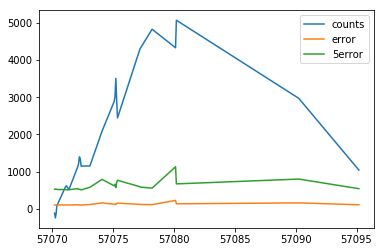

[-639.90322361 -773.80577748 -648.2947779  -443.32974584   83.10513385
  108.17371431   32.4487763     4.80556673  589.53552917  695.24582062
  874.61084195  818.47607778  641.21846388  574.29124535 1295.18326448
 2268.16220295 2351.42530397 2941.00023729 2207.38914058 1677.46310455
 3631.7877025  3711.03526567 4275.12665427 3201.65160603 4402.74631192
 2173.07676939  499.88127264]
cp ./SNstamps/npy/SNHiTS15J_stamps.npy ./SNstamps/npy/brighter/SNHiTS15J_stamps.npy
cp ./SNstamps/npy/SNHiTS15J_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15J_MJDs.npy
cp ./SNstamps/LC/SNHiTS15J.dat ./SNstamps/npy/brighter/SNHiTS15J.dat


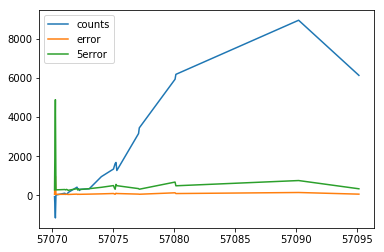

[ -347.03969231 -6030.74102866  -262.1138195   -188.70201254
  -214.63444873  -243.80998301  -210.88517208  -110.73161618
    76.28475398    54.83599976    12.61945647   -42.1420797
    10.96258796    -9.37658656   543.41153572   845.45225921
  1103.90825844  1309.80903691  1118.33633009   774.43640657
  2807.77576341  3129.18693346  5243.76963289  5683.18735093
  8175.7499583   5784.53433668]
[ -91.40595588 -339.01663549 -315.96945986 -252.15003138 -200.49534644
 -256.67891573 -183.1972989  -155.85781828  146.0754451   167.45117788
  166.67141156  205.36108949  159.61460025   56.00479433   36.94722098
  167.61031942  294.98940114  433.49255627  187.67507927   44.12318229
  334.94242574  350.51180524  365.84941433  103.37158956    3.52632188
   -2.10011873]
cp ./SNstamps/npy/SNHiTS15L_stamps.npy ./SNstamps/npy/brighter/SNHiTS15L_stamps.npy
cp ./SNstamps/npy/SNHiTS15L_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15L_MJDs.npy
cp ./SNstamps/LC/SNHiTS15L.dat ./SNstamps/npy/brighter/SNHiTS15L.dat

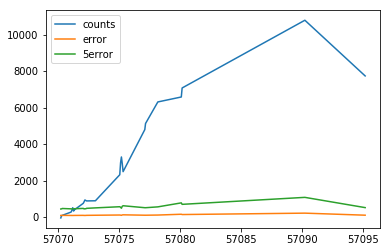

[-488.58313105 -369.56506348 -377.58619753 -176.69970971  -77.60841915
   66.85466239 -117.87584428  -59.53957847  278.62650196  389.51389965
  480.03333204  456.05776436  405.99353064  389.42393778 1752.1582605
 2438.37658302 2810.04121628 2345.04257269 1868.56122424 4280.81081279
 4616.28089561 5751.72173908 5804.15690098 6378.80439043 9708.79290314
 7218.03837202]
[-286.40057524 -255.0614856  -299.97232096 -368.14187045 -266.76095368
 -368.62173025 -201.80479258 -380.39934164 -265.63402805 -288.95900662
 -328.76624527 -238.76711042 -480.51574614 -306.01810605   39.52281924
   74.61441664   83.15634026   -5.1597805   172.78468812  277.54487832
 -469.84347095    2.07201907 -122.3886072 ]
cp ./SNstamps/npy/SNHiTS15N_stamps.npy ./SNstamps/npy/brighter/SNHiTS15N_stamps.npy
cp ./SNstamps/npy/SNHiTS15N_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15N_MJDs.npy
cp ./SNstamps/LC/SNHiTS15N.dat ./SNstamps/npy/brighter/SNHiTS15N.dat


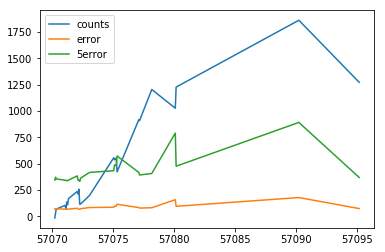

[-359.44181633 -334.73182463 -286.68098043 -238.84994408 -272.92639755
 -201.20631211 -228.88261013 -175.71674933 -147.6378907  -130.377594
  -84.40942052 -216.84418423 -245.1460658  -219.51431895  122.67981469
   47.68141636   72.02808376 -150.69195157  500.31893762  515.22296848
  796.78048497  235.59239761  750.56578818  969.24099696  902.58590495]
cp ./SNstamps/npy/SNHiTS15O_stamps.npy ./SNstamps/npy/brighter/SNHiTS15O_stamps.npy
cp ./SNstamps/npy/SNHiTS15O_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15O_MJDs.npy
cp ./SNstamps/LC/SNHiTS15O.dat ./SNstamps/npy/brighter/SNHiTS15O.dat


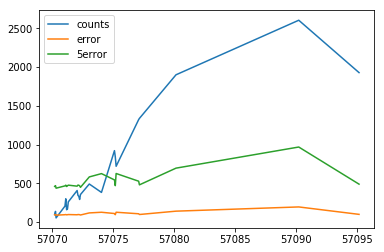

[-363.73810731 -333.24896441 -384.15036414 -261.28376322 -176.10415299
 -300.05515348 -298.92501465 -215.9107816   -56.30344231 -132.09406669
 -142.71701711 -176.87935291  -93.15394432  -91.60252188 -242.8660396
  378.0505879   373.43262425   93.29167304  796.72517318  858.61888276
 1206.29353816 1638.21598445 1441.31885396]
cp ./SNstamps/npy/SNHiTS15P_stamps.npy ./SNstamps/npy/brighter/SNHiTS15P_stamps.npy
cp ./SNstamps/npy/SNHiTS15P_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15P_MJDs.npy
cp ./SNstamps/LC/SNHiTS15P.dat ./SNstamps/npy/brighter/SNHiTS15P.dat


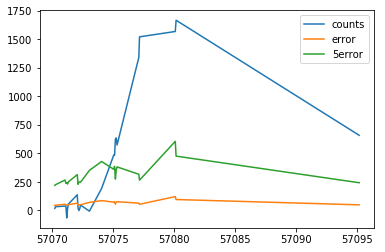

[-201.6766466  -193.15592974 -228.56932122 -198.85189543 -309.15804341
 -214.18827659 -193.85634938 -176.54485526 -210.6019961  -248.01585109
 -234.87194354 -200.79275354 -357.17676602 -236.55772075  125.06633617
   96.88366885  349.56938167  278.56487254  191.85209452 1021.88652255
 1255.07756027  961.96298253 1189.79433346  415.35369321]
cp ./SNstamps/npy/SNHiTS15Q_stamps.npy ./SNstamps/npy/brighter/SNHiTS15Q_stamps.npy
cp ./SNstamps/npy/SNHiTS15Q_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15Q_MJDs.npy
cp ./SNstamps/LC/SNHiTS15Q.dat ./SNstamps/npy/brighter/SNHiTS15Q.dat


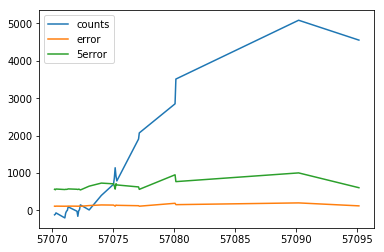

[-684.7113621  -652.16669125 -638.68529211 -759.22579482 -638.49174823
 -584.85763416 -566.40621257 -480.25848019 -587.97458928 -717.9120616
 -582.02652457 -541.76842275 -398.54559552 -636.08991185 -330.21571605
  -12.24029387  213.89712794  572.06593776  200.61096452  107.3200839
 1281.50743194 1509.86689829 1898.84785583 2743.69219707 4083.62076276
 3948.39642959]
cp ./SNstamps/npy/SNHiTS15R_stamps.npy ./SNstamps/npy/brighter/SNHiTS15R_stamps.npy
cp ./SNstamps/npy/SNHiTS15R_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15R_MJDs.npy
cp ./SNstamps/LC/SNHiTS15R.dat ./SNstamps/npy/brighter/SNHiTS15R.dat


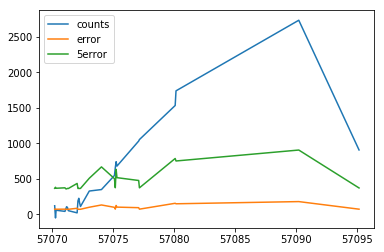

[-246.14000659 -431.52746957 -309.19140221 -331.71698289 -283.59808113
 -250.65408651 -269.3696677  -311.70192192 -414.01558986 -176.42679368
 -139.67174601 -205.31895289 -254.5139819  -179.86604183 -318.89123087
   44.55587096  279.55745362  107.96388856  162.97842313  555.11130282
  679.57295691  745.8716097   987.14955266 1826.9939478   535.05239975]
[-268.95329147 -335.31480107 -193.57126165 -294.75758745 -245.51637197
 -208.56511112 -342.4688668  -282.42305386 -339.47906547 -127.66229168
 -268.97792981 -180.46094643 -172.74791784 -341.34437169  -98.44615324
 -230.32365397 -226.09366175 -215.73348655   96.46204621 -126.18933011
 -182.11381551  172.11373603  335.39200769   57.59613157   96.67837988
  140.34397716  299.94194985]
cp ./SNstamps/npy/SNHiTS15T_stamps.npy ./SNstamps/npy/brighter/SNHiTS15T_stamps.npy
cp ./SNstamps/npy/SNHiTS15T_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15T_MJDs.npy
cp ./SNstamps/LC/SNHiTS15T.dat ./SNstamps/npy/brighter/SNHiTS15T.dat


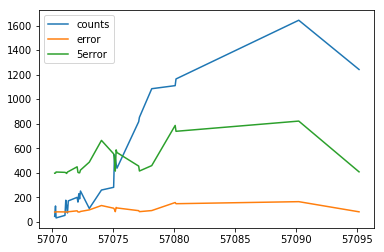

[-351.98617831 -268.21435654 -374.21117831 -350.79463715 -223.97009127
 -266.04144902 -333.72225485 -238.64985168 -249.09213369 -242.11661584
 -171.48449519 -212.69621223 -170.72964786 -377.33972911 -404.76999116
 -273.1958928    39.00859519  102.03247599 -113.63920202 -127.59155565
  361.73580861  437.75370992  626.95672542  324.47074629  426.80913493
  822.17799624  834.60730103]
[-400.22324272 -580.52594386 -373.51369384 -342.67859344 -268.45064879
 -304.72308028 -285.81395468 -278.10281469 -278.39930839 -158.51688763
 -107.13141362  -44.77734858 -331.09386425 -374.42905755  -17.7365136
  -17.52376705  237.43451383 -225.05025258 -196.81224797  193.33748205
  221.55505989  457.63483188  256.72032297  226.91319378  -23.55831085
   46.56264145]
cp ./SNstamps/npy/SNHiTS15V_stamps.npy ./SNstamps/npy/brighter/SNHiTS15V_stamps.npy
cp ./SNstamps/npy/SNHiTS15V_MJDs.npy ./SNstamps/npy/brighter/SNHiTS15V_MJDs.npy
cp ./SNstamps/LC/SNHiTS15V.dat ./SNstamps/npy/brighter/SNHiTS15V.dat


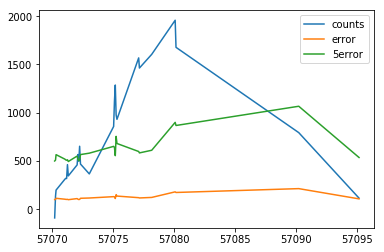

[-589.95670054 -375.85551455 -367.05265563 -206.58195318 -191.13167345
 -190.06916272  -50.23466584 -148.96856414  -91.68432795   48.08655895
   -3.00905934  142.78495427  -97.9415248  -214.81888534  206.05139469
  479.14624221  732.0430338   222.36551792  250.33871539  970.11996219
  879.69313593  994.03907369 1058.57828254  809.93099454 -273.37096448
 -421.14043119]
[-449.17965264 -261.43874622 -175.20451723 -255.57065385 -316.72088072
 -346.12057949 -346.88617346 -353.61564419 -514.05144405 -324.57423363
 -277.51622441 -327.40787418 -442.98001304 -574.62527463 -440.58719604
 -446.47897719 -363.44384009 -195.80821409 -435.10168867  177.01081667
  127.4763636  -745.87178509 -722.46689837 -537.11764828 -258.82660117]
[-383.68764815 -388.48158967 -267.01154009 -329.04052972 -359.39139562
 -367.03344122 -405.50450138 -410.78370795 -492.22335082 -273.60644302
 -368.56081198 -399.77955938 -516.33876223 -440.77237681 -402.69623653
 -114.76971311 -218.36180148   44.44600104  -68.93515133 -15

In [36]:
n_total = 0
n_detected = 0
bright = 0
real_data_stamps = sorted(glob.glob(real_data_path + "*stamps.npy"), key=str.lower)
real_data_mjds = sorted(glob.glob(real_data_path + "*MJDs.npy"), key=str.lower)
#lc_path_list = sorted(glob.glob(real_lc_path + "*dat"), key=str.lower)
#print(matched_lc[0])
#asdasd
save_path = real_data_path+"brighter/"
os.system("rm "+save_path+"*")
for i, frame in enumerate(lc_data):
    first_detection_day = np.argmax(frame["ADU"].values)
    diff_days = frame["MJD"].values[first_detection_day] - frame["MJD"].values[0]
    if np.amax(frame["ADU"].values) > 1500: #and diff_days <= 10:# or np.amax(frame["ADU"].values) > 1500:
        # Stamps
        stamp_name = matched_stamps[i].split("/")[-1]
        print("cp "+matched_stamps[i]+" "+save_path+stamp_name)
        os.system("cp "+matched_stamps[i]+" "+save_path+stamp_name)
        # MJD
        mjd_name = matched_mjds[i].split("/")[-1]
        print("cp "+matched_mjds[i]+" "+save_path+mjd_name)
        os.system("cp "+matched_mjds[i]+" "+save_path+mjd_name)
        # Light Curves
        lc_name = matched_lc[i].split("/")[-1]
        print("cp "+matched_lc[i]+" "+save_path+lc_name)
        os.system("cp "+matched_lc[i]+" "+save_path+lc_name)
        
        bright += 1
        days = frame["MJD"].values
        plt.plot(days, frame["ADU"].values, label="counts")
        plt.plot(days, frame["e_ADU"].values, label="error")
        plt.plot(days, frame["e_ADU"].values*5, label="5error")
        plt.legend()
        plt.show()
    print(frame["ADU"].values-frame["e_ADU"].values*5)
    if np.sum(frame["ADU"].values-frame["e_ADU"].values*4.5>0)>0:
        n_detected += 1
    n_total += 1
print(n_detected, n_total, bright)

In [9]:
plt.figure(figsize=(12, 7))
for i, lc in enumerate(rough_lc):
    plt.plot(days[i], lc, alpha=0.4)
plt.ylim([-10000, 10000])
plt.show()

NameError: name 'rough_lc' is not defined

<Figure size 864x504 with 0 Axes>

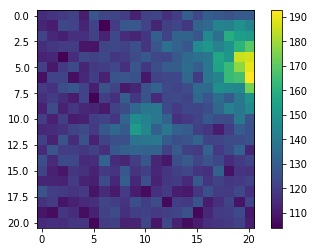

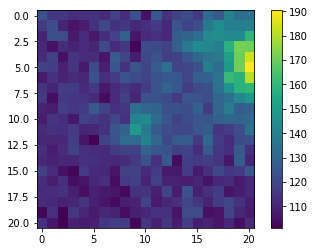

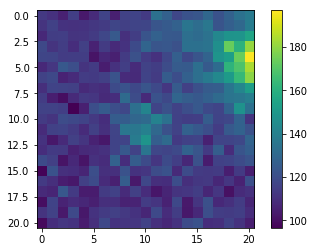

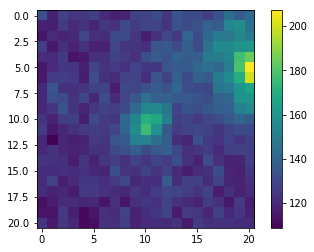

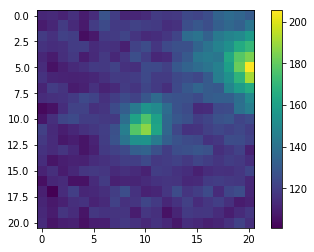

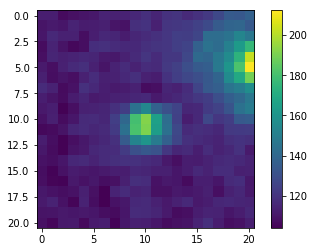

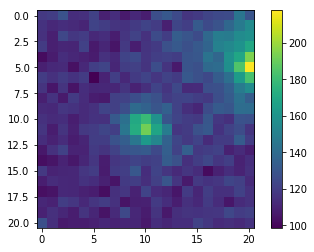

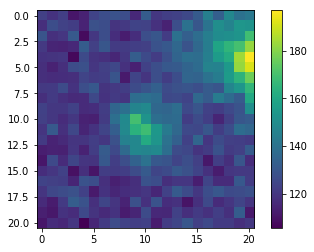

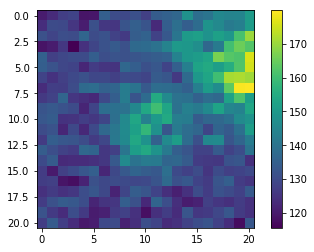

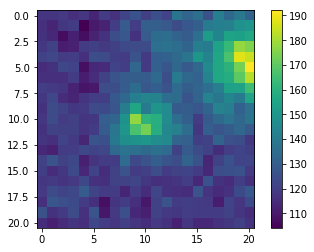

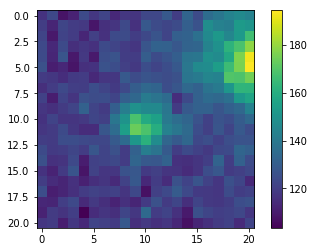

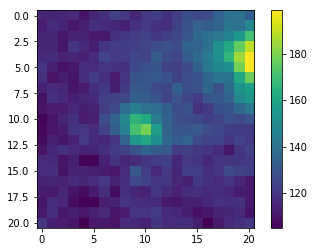

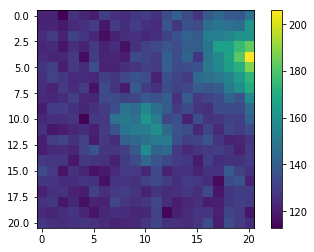

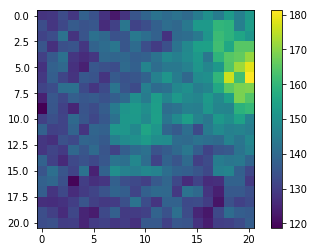

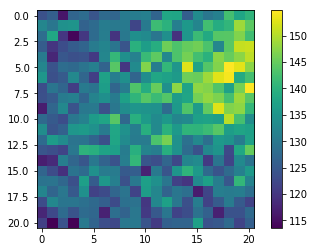

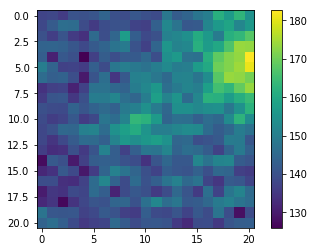

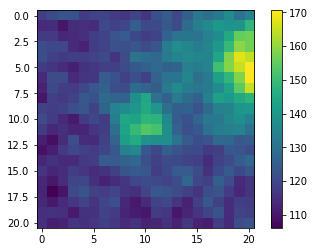

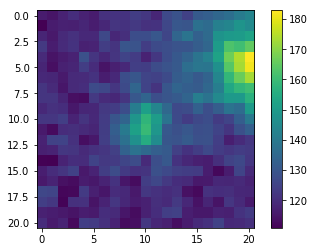

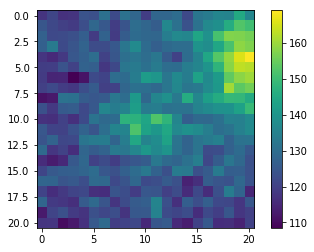

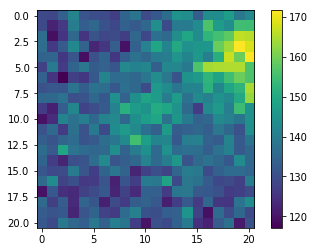

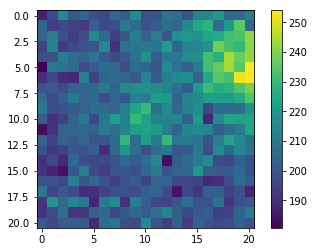

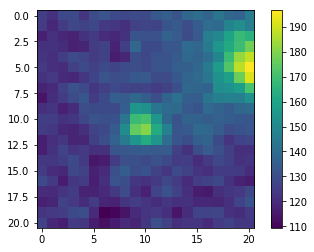

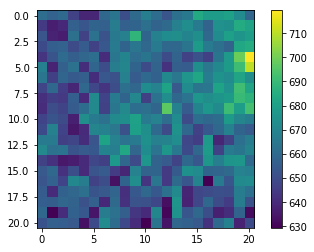

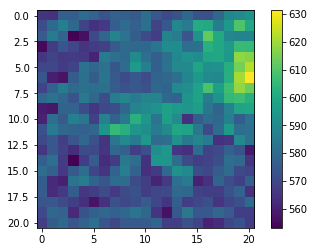

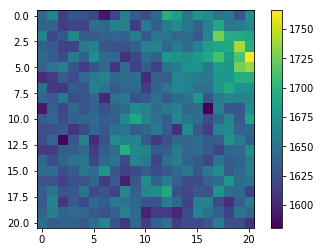

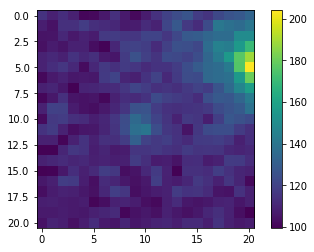

In [16]:
for i in range(stamps[0].shape[0]):
    plt.imshow(stamps[0][i, :, :])
    plt.colorbar()
    plt.show()
    plt.close("all")